In [257]:
import numpy as np
from matplotlib import pyplot as plt
#plt.style.use('tdrstyle.mplstyle')

In [258]:
# Calculate B field in ideal ATLAS toroid as function of radius [m]
def B(R):
    Rin = 1.05
    Rout = 5.10
    Bmax = 4.1
    if R < Rin :
        return 0
    elif R > Rout :
        return 0
    return Bmax*Rin/R

In [259]:
B(5.1)

0.8441176470588235

In [260]:
# sagitta in toroid given p[GeV], radius in toroid [m], and length traversed [m]
def sagitta (p, r, l): 
    return 0.3/8*l*l*B(r)/p

In [261]:
# Calculate eta from Theta
def Eta(Theta):
    return -np.log(np.tan(Theta/2))

In [262]:
# Calculate Theta from R and Z
def ThetaRZ(R,Z):
    return np.arctan(R/Z)

In [263]:
def EtaRZ(R,Z):
    return Eta(ThetaRZ(R,Z))

In [264]:
rmin = 1.05 # m, toroid inner radius
rmax = 5.10 # m, toroid outer radius
len = 5.0 # m, toroid depth
pgen = 1000 # GeV, muon momentum
dr = 0.1
res = 150 # position res in microns
Zpos1 = 60 # m first station location
Zpos2 = 300 # m second station location
rvalues = np.arange(rmin, rmax, dr)
bvalues = [0] * rvalues.size
svalues = [0] * rvalues.size
drvalues = [0] * rvalues.size
resvalues = [0] * rvalues.size
etavalues1  = [0] * rvalues.size
etavalues2  = [0] * rvalues.size
for i in range(rvalues.size):
  bvalues[i] = B(rvalues[i])
  svalues[i] = sagitta(pgen,rvalues[i],len)*1E6
  drvalues[i] = 2*svalues[i]
  resvalues[i] = res*np.sqrt(2)/(2*svalues[i])*100 # sqrt(2) because difference of two r measurements
  etavalues1[i] = EtaRZ(rvalues[i],Zpos1)
  etavalues2[i] = EtaRZ(rvalues[i],Zpos2)

Text(0.5, 0, 'r [m]')

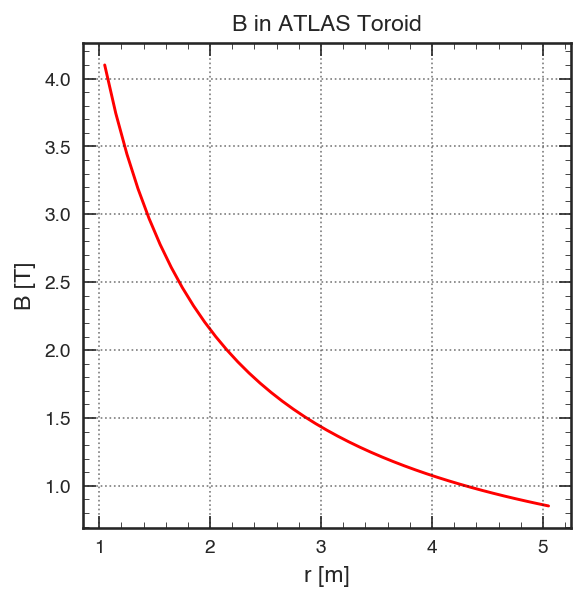

In [265]:
plt.plot(rvalues, bvalues,'r')
plt.title('B in ATLAS Toroid')
plt.ylabel('B [T]')
plt.xlabel('r [m]')

Text(0.5, 0, 'r [m]')

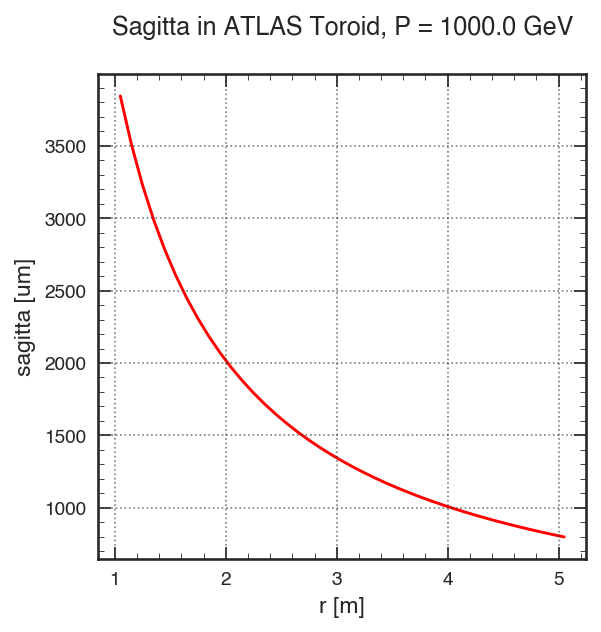

In [266]:
plt.plot(rvalues, svalues,'r')
plt.title('Sagitta in ATLAS Toroid, P = %.1f GeV\n' %(pgen), fontsize=12)
plt.ylabel('sagitta [um]')
plt.xlabel('r [m]')

Text(0.5, 0, 'r [m]')

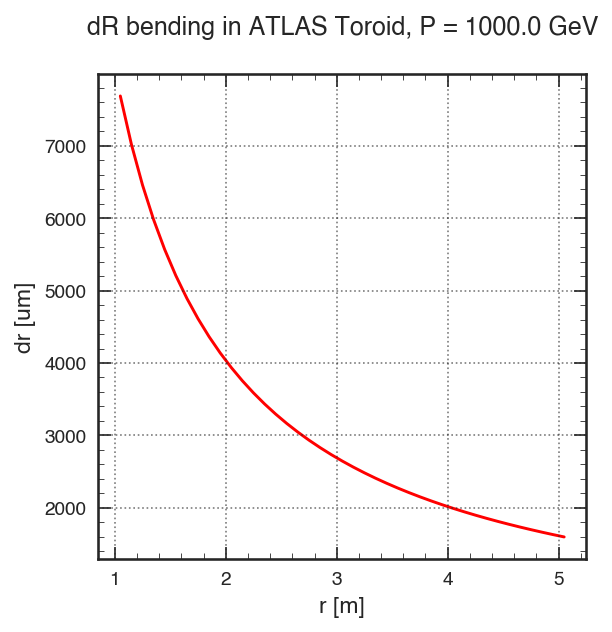

In [267]:
plt.plot(rvalues, drvalues,'r')
plt.title('dR bending in ATLAS Toroid, P = %.1f GeV\n' %(pgen), fontsize=12)
plt.ylabel('dr [um]')
plt.xlabel('r [m]')

In [278]:
# Show resolution for other momenta, assuming prop. to momentum
resvalues1 = [0] * rvalues.size
resvalues2 = [0] * rvalues.size
resvalues3 = [0] * rvalues.size
for i in range(rvalues.size):
  resvalues1[i] = resvalues[i] * 0.75
  resvalues2[i] = resvalues[i] * 0.5
  resvalues3[i] = resvalues[i] * 0.25

Text(0.5, 0, 'r [m]')

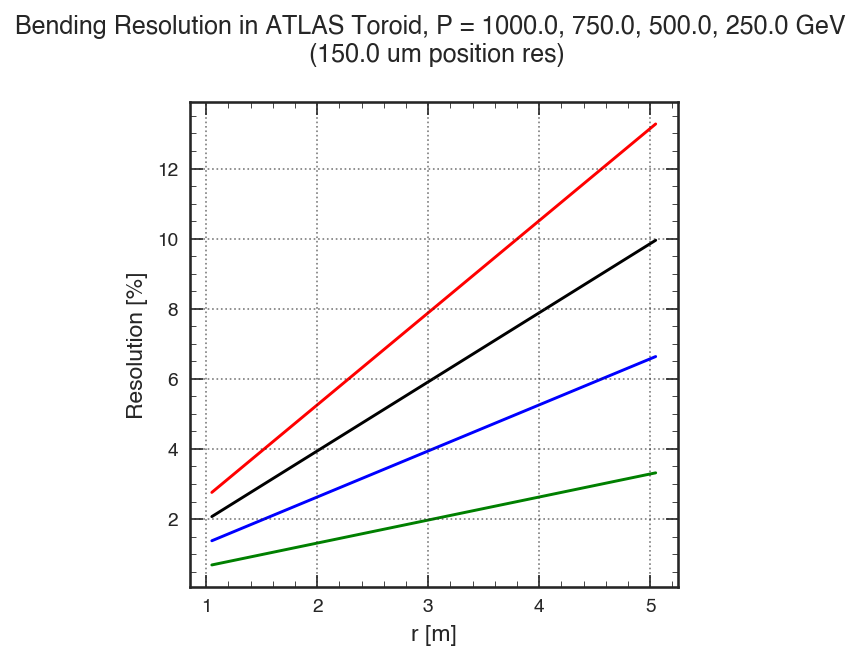

In [283]:
plt.plot(rvalues, resvalues,'r')
plt.plot(rvalues, resvalues1,'k')
plt.plot(rvalues, resvalues2,'b')
plt.plot(rvalues, resvalues3,'g')
plt.title('Bending Resolution in ATLAS Toroid, P = %.1f, %.1f, %.1f, %.1f GeV \n (%.1f um position res)\n' %(pgen, pgen*0.75, pgen*0.5, pgen*0.25, res), fontsize=12)
plt.ylabel('Resolution [%]')
plt.xlabel('r [m]')

In [269]:
EtaRZ(5,60)

3.179785437699879

Text(0.5, 0, 'eta')

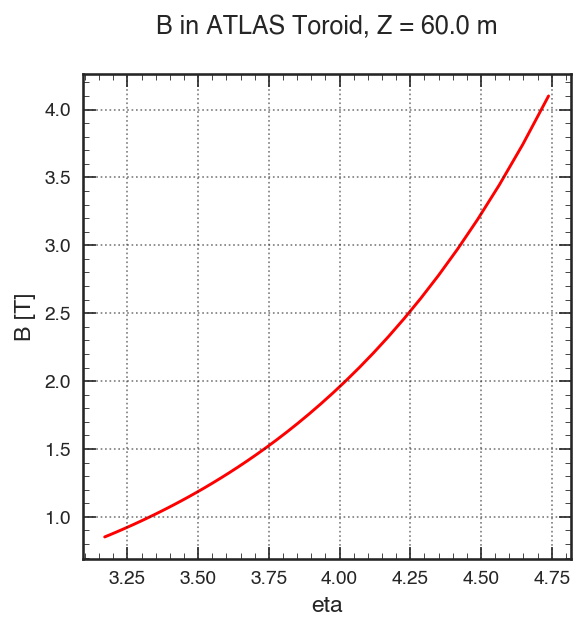

In [270]:
plt.plot(etavalues1, bvalues,'r')
plt.title('B in ATLAS Toroid, Z = %.1f m\n' %(Zpos1), fontsize=12)
plt.ylabel('B [T]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

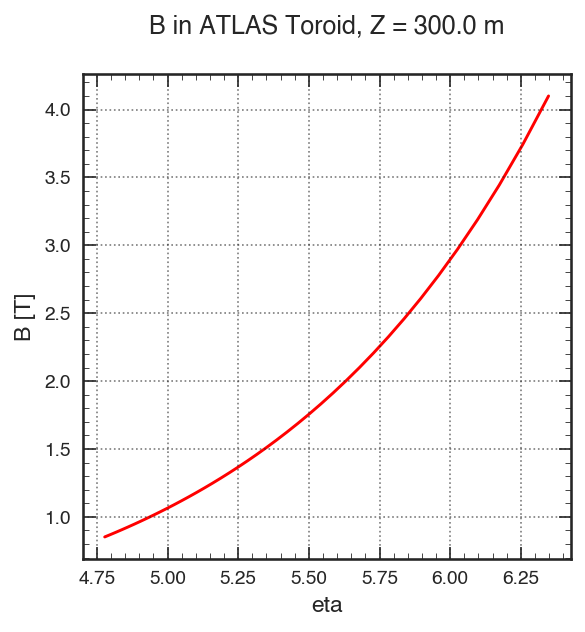

In [271]:
plt.plot(etavalues2, bvalues,'r')
plt.title('B in ATLAS Toroid, Z = %.1f m\n' %(Zpos2), fontsize=12)
plt.ylabel('B [T]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

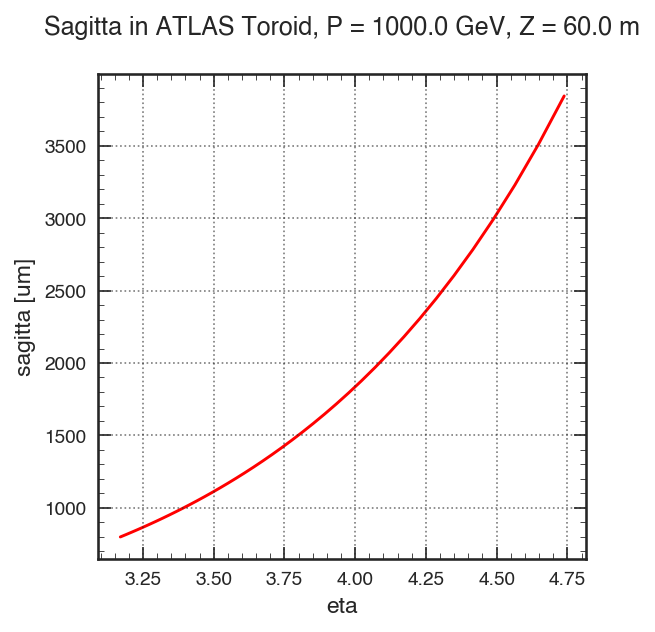

In [272]:
plt.plot(etavalues1, svalues,'r')
plt.title('Sagitta in ATLAS Toroid, P = %.1f GeV, Z = %.1f m\n' %(pgen, Zpos1), fontsize=12)
plt.ylabel('sagitta [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

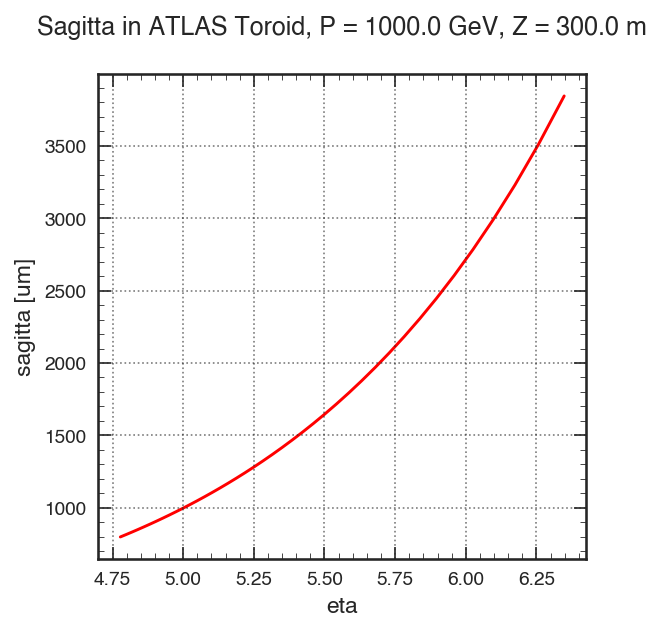

In [273]:
plt.plot(etavalues2, svalues,'r')
plt.title('Sagitta in ATLAS Toroid, P = %.1f GeV, Z = %.1f m\n' %(pgen, Zpos2), fontsize=12)
plt.ylabel('sagitta [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

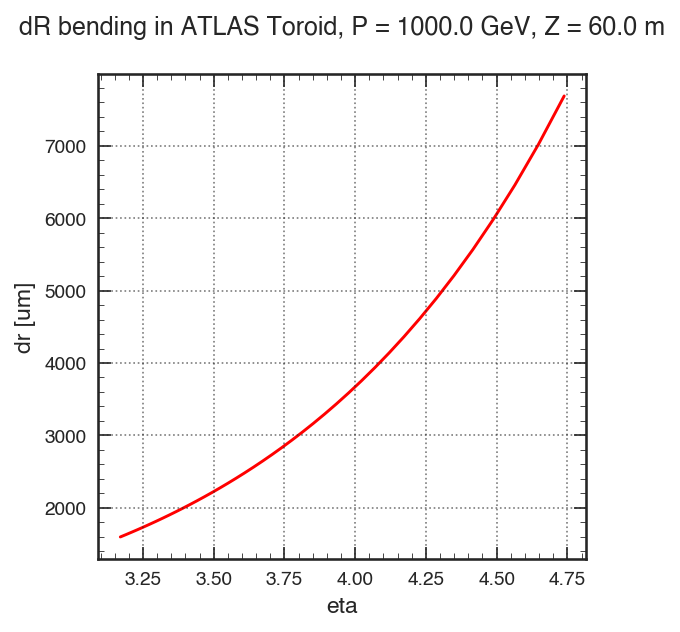

In [274]:
plt.plot(etavalues1, drvalues,'r')
plt.title('dR bending in ATLAS Toroid, P = %.1f GeV, Z = %.1f m\n' %(pgen, Zpos1), fontsize=12)
plt.ylabel('dr [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

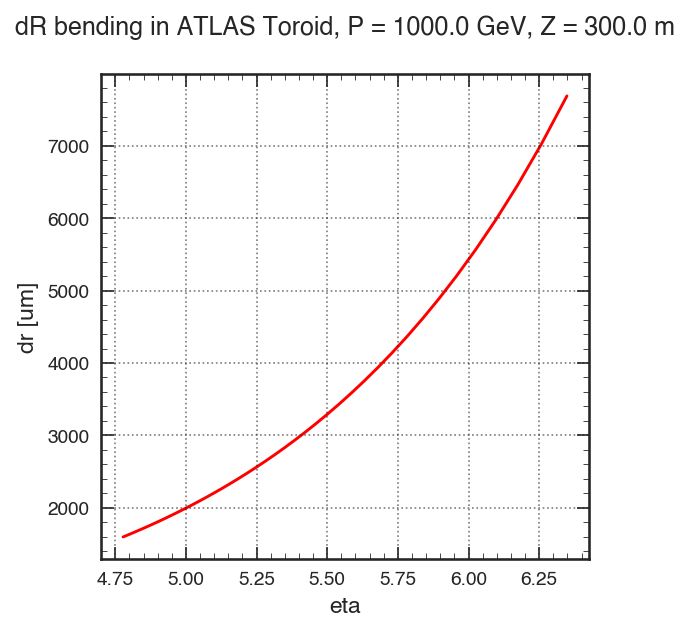

In [275]:
plt.plot(etavalues2, drvalues,'r')
plt.title('dR bending in ATLAS Toroid, P = %.1f GeV, Z = %.1f m\n' %(pgen,Zpos2), fontsize=12)
plt.ylabel('dr [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

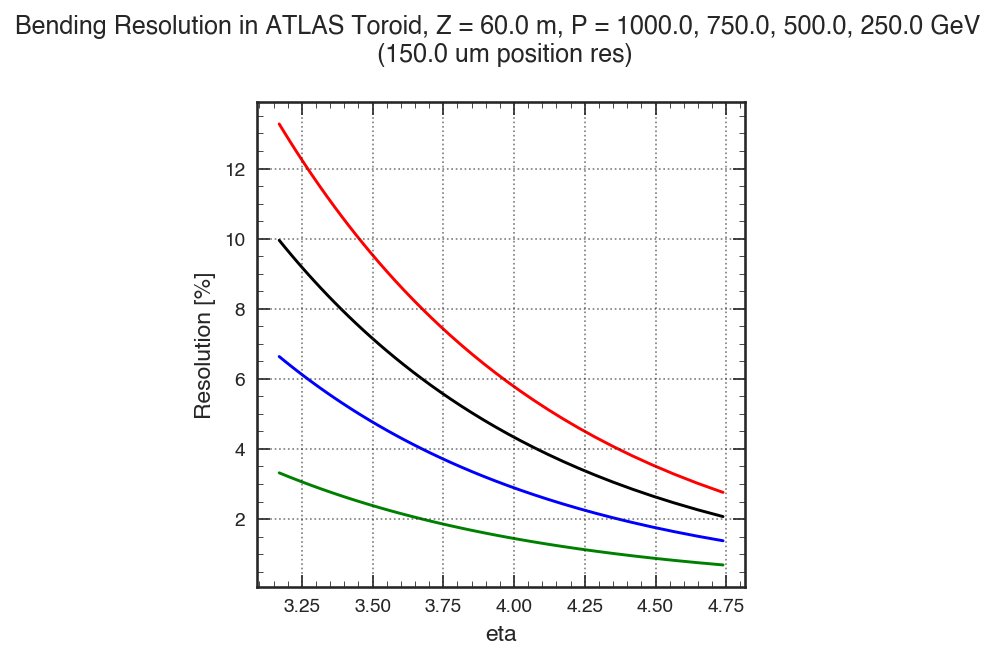

In [286]:
plt.plot(etavalues1, resvalues,'r')
plt.plot(etavalues1, resvalues1,'k')
plt.plot(etavalues1, resvalues2,'b')
plt.plot(etavalues1, resvalues3,'g')
plt.title('Bending Resolution in ATLAS Toroid, Z = %.1f m, P = %.1f, %.1f, %.1f, %.1f GeV \n (%.1f um position res)\n' %(Zpos1, pgen, pgen*0.75, pgen*0.5, pgen*0.25, res), fontsize=12)
plt.ylabel('Resolution [%]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

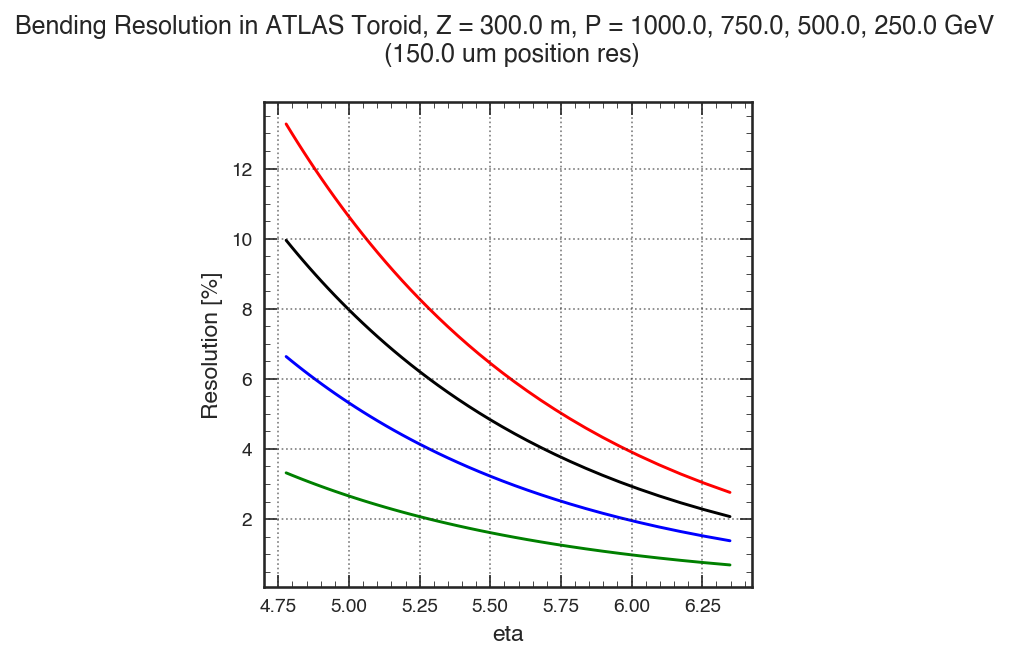

In [287]:
plt.plot(etavalues2, resvalues,'r')
plt.plot(etavalues2, resvalues1,'k')
plt.plot(etavalues2, resvalues2,'b')
plt.plot(etavalues2, resvalues3,'g')
plt.title('Bending Resolution in ATLAS Toroid, Z = %.1f m, P = %.1f, %.1f, %.1f, %.1f GeV \n (%.1f um position res)\n' %(Zpos2, pgen, pgen*0.75, pgen*0.5, pgen*0.25, res), fontsize=12)
plt.ylabel('Resolution [%]')
plt.xlabel('eta')